In [541]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

## Parsing and cleaning

In [542]:
df = pd.read_csv("data_v6.csv")
df

,Name,CVR,BusinessAddress,StartDate,Status,IndustryCode,IndustryName,Area,AreaCode,NumEmployees,...,DistanceToBusinessMeters,DistanceToBusinessDriveSeconds,DirectorAddressLatitude,DirectorAddressLongitude,BusinessAddressLatitude,BusinessAddressLongitude,StartYear,StartDecade,IndustryShortCode,IndustryGroup
0,POULSEN & HANSEN A/S,76958211,"C/O Flethøj Ejendomsadministration ApS, Energi...",1985-01-17,NORMAL,682040,Udlejning af erhvervsejendomme,København,101,6,...,3237.0,606.0,55.671052,12.561257,55.657727,12.557978,1985,1980,68,Fast ejendom
1,SWEDISH ORPHAN BIOVITRUM A/S,19179079,Sorgenfrivej 17,1996-02-08,NORMAL,464610,Engroshandel med medicinalvarer og sygeplejear...,Lyngby-Taarbæk,173,11,...,696252.0,35422.0,59.260329,18.194249,55.137627,14.758286,1996,1990,46,Engros og detail.; rep. af motorkøretøjer og -...
2,Oticon Denmark A/S,42338028,Kongebakken 9,1972-05-26,NORMAL,465220,Engroshandel med telekommunikationsudstyr,Egedal,240,61,...,383203.0,18336.0,55.762722,12.549633,57.486851,10.337709,1972,1970,46,Engros og detail.; rep. af motorkøretøjer og -...
3,BADEN-JENSEN A/S,29167613,Baltorpbakken 16,1970-02-19,NORMAL,467320,"Engroshandel med lak, maling, tapet, gulvbelæg...",Ballerup,151,37,...,30477.0,1455.0,55.816496,12.544167,55.731771,12.338362,1970,1970,46,Engros og detail.; rep. af motorkøretøjer og -...
4,REITAN CONVENIENCE DENMARK A/S,15516046,Buddingevej 195,1991-10-01,NORMAL,829900,Anden forretningsservice i.a.n.,Gladsaxe,159,63,...,NaN,NaN,NaN,NaN,55.751531,12.496268,1991,1990,82,Administrative tjenesteydelser og hjælpetjenester
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164,M A T ApS,26596300,Gersonsvej 7,2002-05-02,NORMAL,464210,Engroshandel med beklædning,Gentofte,157,18,...,4973.0,554.0,55.769713,12.585628,55.733208,12.566897,2002,2000,46,Engros og detail.; rep. af motorkøretøjer og -...
2165,F.A. CONSULTING A/S,27080049,"Herlev Ringvej 2C, 1.",2003-01-02,NORMAL,620200,Konsulentbistand vedrørende informationsteknologi,Herlev,163,2,...,15683.0,1169.0,55.708582,12.597020,55.723171,12.441770,2003,2000,62,Information og kommunikation
2166,A-SAFE ApS,35252932,"Rugvænget 46A, 1.",2013-06-01,NORMAL,467400,"Engroshandel med isenkram, varmeanlæg og tilbehør",Høje Taastrup,169,4,...,1568078.0,64420.0,53.706530,-1.875317,55.649471,12.285993,2013,2010,46,Engros og detail.; rep. af motorkøretøjer og -...
2167,A.A. EL-CENTER A/S,66358119,Krondalvej 7,1980-10-29,NORMAL,432100,El-installation,Rødovre,175,5,...,4805.0,544.0,55.671301,12.405901,55.700383,12.434073,1980,1980,43,Bygge- og anlægsvirksomhed


In [543]:
df.dtypes

Name                               object
CVR                                 int64
BusinessAddress                    object
StartDate                          object
Status                             object
IndustryCode                        int64
IndustryName                       object
Area                               object
AreaCode                            int64
NumEmployees                        int64
DirectorName                       object
DirectorAddress                    object
DirectorId                          int64
RegisteredCapital                 float64
RegisteredCapitalCurrency          object
NumPeople                         float64
NumCars                           float64
DistanceToBusinessMeters          float64
DistanceToBusinessDriveSeconds    float64
DirectorAddressLatitude           float64
DirectorAddressLongitude          float64
BusinessAddressLatitude           float64
BusinessAddressLongitude          float64
StartYear                         

In [544]:
max(df["RegisteredCapital"])

9292139.0

In [545]:
df[['NumEmployees', 'RegisteredCapital', 'NumPeople', 'NumCars', 'DistanceToBusinessMeters', 'DistanceToBusinessDriveSeconds']]

,NumEmployees,RegisteredCapital,NumPeople,NumCars,DistanceToBusinessMeters,DistanceToBusinessDriveSeconds
0,6,500000.0,1.0,6.0,3237.0,606.0
1,11,500000.0,1.0,0.0,696252.0,35422.0
2,61,1000000.0,0.0,6.0,383203.0,18336.0
3,37,3600000.0,0.0,0.0,30477.0,1455.0
4,63,7000000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2164,18,1000000.0,0.0,2.0,4973.0,554.0
2165,2,500000.0,0.0,2.0,15683.0,1169.0
2166,4,200000.0,0.0,4.0,1568078.0,64420.0
2167,5,500000.0,0.0,1.0,4805.0,544.0


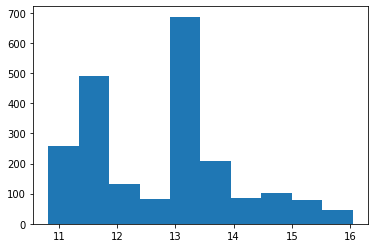

In [546]:
plt.hist(np.log(df["RegisteredCapital"]))
plt.show()

In [547]:
#Function to print summary statistics of data
def summ(X):
    print(f"\tMin: {min(X)}")
    print(f"\tQ1: {np.percentile(X,[25,50,75])[0]}")
    print(f"\tMedian: {np.percentile(X,[25,50,75])[1]}")
    print(f"\tMean: {round(sum(X)/len(X),1)}")    
    print(f"\tQ3: {np.percentile(X,[25,50,75])[2]}") 
    print(f"\tMax: {max(X)}")
print("Summary statistics of RegisteredCapital in DKK for 2758 Companies:")
summ(df["RegisteredCapital"])

Summary statistics of RegisteredCapital in DKK for 2758 Companies:
	Min: 50001.0
	Q1: 125000.0
	Median: 500000.0
	Mean: 803442.8
	Q3: 625000.0
	Max: 9292139.0


In [548]:
#Making a copy of the dataframe when changin "nan" to 0
dfc=df.copy()
for i in range(len(dfc)):
    if str(dfc["NumPeople"][i]) == "nan":
        dfc["NumPeople"][i] = 0
    if str(dfc["NumCars"][i]) == "nan":
        dfc["NumCars"][i] = 0

/home/julius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/julius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


## Sci-kit Learn used to analyse the data and create predictors

In [549]:
from sklearn.linear_model import LinearRegression as Linear
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression as Logistic
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [550]:
objects = dfc[["NumPeople","NumCars"]]
regcap = df["RegisteredCapital"]

In [551]:
XY=pd.DataFrame(list(zip(objects["NumCars"],objects["NumPeople"],regcap)))
XY.columns =['NumCars', 'NumPeople', 'RegisteredCapital']
XY=XY.sort_values(by="RegisteredCapital",ignore_index=True)
p20=XY.loc[round(len(XY)*0.8):]
p80=XY.loc[:round(len(XY)*0.8)]
print(p20["RegisteredCapital"].sum(),p80["RegisteredCapital"].sum(),XY["RegisteredCapital"].sum(),p20["RegisteredCapital"].sum()/XY["RegisteredCapital"].sum())
print(len(p20),len(p80),len(p20)/len(XY),len(p80)/len(XY))

1184643895.38 559023565.97 1742667461.35 0.6797876942410382
434 1736 0.2000922083909636 0.8003688335638544


In [552]:
#Define wealthy company as >500000
wealthy=[int]*len(regcap)
for i,cap in enumerate(regcap):
    if cap > 500000:
        wealthy[i]=1
    else:
        wealthy[i]=0
print((len(wealthy)-len([n for n in wealthy if n==1]))/len(wealthy))

0.6795758414015676


In [553]:
len([n for n in wealthy if n==1])/len(wealthy)

0.3204241585984325

In [554]:
#Robust transformation
median_x = np.percentile(regcap,[25,50,75])[1]
q1 = np.percentile(regcap,[25,50,75])[0]
q3 = np.percentile(regcap,[25,50,75])[2]
regcap_T=[np.float64]*len(regcap)

for i in range(len(regcap)):
    regcap_T[i]=(regcap[i]-median_x)/(q3-q1)

In [555]:
summ(regcap_T)

	Min: -0.899998
	Q1: -0.75
	Median: 0.0
	Mean: 0.6
	Q3: 0.25
	Max: 17.584278


In [577]:
#Linear regression on registere capital, logistic and Linear Discriminant Analysis for classifiers
reg = Linear()
reg.fit(objects,regcap_T)
print(reg.score(objects,regcap_T))
def mls(x,y):
    log = Logistic(class_weight="balanced")
    log.fit(x,y)
    print(f"f1: {f1_score(y,log.predict(x))}")
    print(f"p: {precision_score(y,log.predict(x))}")
    print(f"r: {recall_score(y,log.predict(x))}")
    print(log.score(x,y))
    lda=LDA()
    lda.fit(x,y)
    ldx=lda.transform(x)
    print(lda.score(x,y))
    return log
log1=mls(objects[["NumCars","NumPeople"]],wealthy)

0.355175496356383
f1: 0.4792758456407814
p: 0.35826210826210825
r: 0.7237410071942446
0.49608114338404796
0.6795758414015676


/home/julius/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [557]:
summ(objects["NumPeople"])
print("")
summ(objects["NumCars"])

	Min: 0.0
	Q1: 0.0
	Median: 0.0
	Mean: 0.4
	Q3: 0.0
	Max: 14.0

	Min: 0.0
	Q1: 0.0
	Median: 2.0
	Mean: 4.5
	Q3: 6.0
	Max: 33.0


In [558]:
objects2=pd.DataFrame(list(zip(objects["NumCars"],objects["NumPeople"],wealthy)))
objects2.columns =['NumCars', 'NumPeople', 'Wealthy']
objects2=objects2.loc[(objects2["NumPeople"]!=0) | (objects2["NumCars"]!=0)]
1-len(objects2)/len(objects)

0.28722913785154447

In [559]:
summ(objects2["NumPeople"])
print("")
summ(objects2["NumCars"])

	Min: 0.0
	Q1: 0.0
	Median: 0.0
	Mean: 0.6
	Q3: 1.0
	Max: 14.0

	Min: 0.0
	Q1: 2.0
	Median: 4.0
	Mean: 6.4
	Q3: 9.0
	Max: 33.0


In [560]:
#Linear regression on registere capital, logistic and Linear Discriminant Analysis for classifiers
X = objects2[["NumCars","NumPeople"]]
Y = objects2["Wealthy"]
mls(X,Y)

f1: 0.46758620689655167
p: 0.3445121951219512
r: 0.7274678111587983
0.500646830530401
0.6985769728331177


/home/julius/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Different Threshholds

In [572]:
wealthy2=[int]*len(regcap)
for i,cap in enumerate(regcap):
    if cap > 250000:
        wealthy2[i]=1
    else:
        wealthy2[i]=0
print((len(wealthy2)-len([n for n in wealthy2 if n==1]))/len(wealthy2),len([n for n in wealthy2 if n==1]))

wealthy3=[int]*len(regcap)
for i,cap in enumerate(regcap):
    if cap > 1000000:
        wealthy3[i]=1
    else:
        wealthy3[i]=0
print((len(wealthy3)-len([n for n in wealthy3 if n==1]))/len(wealthy3),len([n for n in wealthy3 if n==1]))


#What if it's 500,000 or above?
wealthy4=[int]*len(regcap)
for i,cap in enumerate(regcap):
    if cap >= 500000:
        wealthy4[i]=1
    else:
        wealthy4[i]=0
print((len(wealthy4)-len([n for n in wealthy4 if n==1]))/len(wealthy4),len([n for n in wealthy4 if n==1]))

0.4140156754264638 1271
0.8464730290456431 333
0.446288612263716 1201


In [574]:
print(len([a for a in wealthy4 if a == 1])/len(wealthy4))

0.553711387736284


In [578]:
print("200000:")
log2=mls(objects[["NumCars","NumPeople"]],wealthy2)
print("1000000:")
mls(objects[["NumCars","NumPeople"]],wealthy3)
#print("10000000:")
#mls(objects[["NumCars","NumPeople"]],wealthy4)

200000:
f1: 0.6729309721720275
p: 0.6223262032085561
r: 0.7324940991345398
0.582757030889811
0.598893499308437
1000000:
f1: 0.27755568246716167
p: 0.17136812411847674
r: 0.7297297297297297
0.41678192715537116
0.8464730290456431


/home/julius/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/julius/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [564]:
objects=pd.DataFrame(list(zip(objects["NumCars"],objects["NumPeople"],wealthy)))
objects.columns =['NumCars', 'NumPeople', 'Wealthy']
def splitter(obje):
    obj=[]
    obj.append(obje[(obje["NumCars"]<5) & (obje["NumPeople"]<5)])
    obj.append(obje[(obje["NumCars"]<5) & (obje["NumPeople"]>4) & (obje["NumPeople"]<10)])
    obj.append(obje[(obje["NumCars"]<5) & (obje["NumPeople"]>9) & (obje["NumPeople"]<15)])
    obj.append(obje[(obje["NumCars"]>4) & (obje["NumCars"]<10) & (obje["NumPeople"]<5)])
    obj.append(obje[(obje["NumCars"]>4) & (obje["NumCars"]<10) & (obje["NumPeople"]>4) & (obje["NumPeople"]<10)])
    obj.append(obje[(obje["NumCars"]>4) & (obje["NumCars"]<10) & (obje["NumPeople"]>9) & (obje["NumPeople"]<15)])
    obj.append(obje[(obje["NumCars"]>9) & (obje["NumCars"]<15) & (obje["NumPeople"]<5)])
    obj.append(obje[(obje["NumCars"]>9) & (obje["NumCars"]<15) & (obje["NumPeople"]>4) & (obje["NumPeople"]<10)])
    obj.append(obje[(obje["NumCars"]>9) & (obje["NumCars"]<15) & (obje["NumPeople"]>9) & (obje["NumPeople"]<15)])
    obj.append(obje[(obje["NumCars"]>14) & (obje["NumCars"]<20) & (obje["NumPeople"]<5)])
    obj.append(obje[(obje["NumCars"]>14) & (obje["NumCars"]<20) & (obje["NumPeople"]>4) & (obje["NumPeople"]<10)])
    obj.append(obje[(obje["NumCars"]>14) & (obje["NumCars"]<20) & (obje["NumPeople"]>9) & (obje["NumPeople"]<15)])
    obj.append(obje[(obje["NumCars"]>19) & (obje["NumCars"]<25) & (obje["NumPeople"]<5)])
    obj.append(obje[(obje["NumCars"]>19) & (obje["NumCars"]<25) & (obje["NumPeople"]>4) & (obje["NumPeople"]<10)])
    obj.append(obje[(obje["NumCars"]>19) & (obje["NumCars"]<25) & (obje["NumPeople"]>9) & (obje["NumPeople"]<15)])
    obj.append(obje[(obje["NumCars"]>24) & (obje["NumCars"]<30) & (obje["NumPeople"]<5)])
    obj.append(obje[(obje["NumCars"]>24) & (obje["NumCars"]<30) & (obje["NumPeople"]>4) & (obje["NumPeople"]<10)])
    obj.append(obje[(obje["NumCars"]>24) & (obje["NumCars"]<30) & (obje["NumPeople"]>9) & (obje["NumPeople"]<15)])
    obj.append(obje[(obje["NumCars"]>29) & (obje["NumCars"]<36) & (obje["NumPeople"]<5)])
    obj.append(obje[(obje["NumCars"]>29) & (obje["NumCars"]<36) & (obje["NumPeople"]>4) & (obje["NumPeople"]<10)])
    obj.append(obje[(obje["NumCars"]>29) & (obje["NumCars"]<36) & (obje["NumPeople"]>9) & (obje["NumPeople"]<15)])
    return obj

In [581]:
def get_val(objec):
    value=[]
    obj=splitter(objec)
    for o in obj:
        if len(o)==0:
            value.append(o["Wealthy"].sum())
        else:
            value.append(o["Wealthy"].sum()/len(o))
    return value

In [566]:
objects3=pd.DataFrame(list(zip(objects["NumCars"],objects["NumPeople"],wealthy2)))
objects3.columns =['NumCars', 'NumPeople', 'Wealthy']

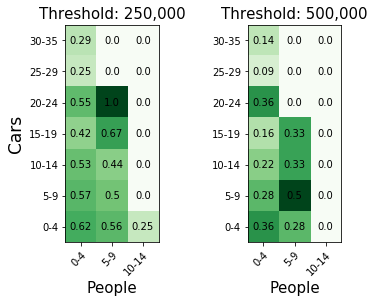

In [580]:
Cars = ["0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-35"]
Cars.reverse()
People = ["0-4", "5-9", "10-14"]

vlue = []
value2 = get_val(objects3)
for i in range(7):
    v=[]
    for j in range(3):
        v.append(round(value2[i*3+j],2))
    vlue.append(v)
vlue.reverse()
vlue = np.array(vlue,dtype=np.float)

fig, (ax1, ax2) = plt.subplots(1,2)
im = ax1.imshow(vlue,cmap="Greens")
# Show all ticks and label them with the respective list entries
ax1.set_xticks(np.arange(len(People)))
ax1.set_yticks(np.arange(len(Cars)))

ax1.set_xticklabels(People)
ax1.set_yticklabels(Cars)
ax1.set_xlabel("People", size=15)
ax1.set_ylabel("Cars", size=17)

# Rotate the tick labels and set their alignment.
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(Cars)):
    for j in range(len(People)):
        text = ax1.text(j, i, vlue[i, j],
                       ha="center", va="center", color="black")

ax1.set_title("Threshold: 250,000", size=15)

vlue = []
value = get_val(objects)
for i in range(7):
    v=[]
    for j in range(3):
        v.append(round(value[i*3+j],2))
    vlue.append(v)
vlue.reverse()
vlue = np.array(vlue,dtype=np.float)

#fig, ax = plt.subplots()
im = ax2.imshow(vlue,cmap="Greens")

# Show all ticks and label them with the respective list entries
ax2.set_xticks(np.arange(len(People)))
ax2.set_yticks(np.arange(len(Cars)))

ax2.set_xticklabels(People)
ax2.set_yticklabels(Cars)
ax2.set_xlabel("People", size=15)

# Rotate the tick labels and set their alignment.
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(Cars)):
    for j in range(len(People)):
        text = ax2.text(j, i, vlue[i, j],
                       ha="center", va="center", color="black")

ax2.set_title("Threshold: 500,000", size=15)
plt.show()

In [582]:
print(len([n for n in wealthy if n == 1])/len(wealthy))
print(len([n for n in wealthy2 if n == 1])/len(wealthy2))

0.3204241585984325
0.5859843245735362


In [585]:
objects4 = pd.DataFrame(list(zip(objects["NumCars"],objects["NumPeople"],log1.predict(objects[["NumCars","NumPeople"]]))))
objects4.columns =['NumCars', 'NumPeople', 'Wealthy']

objects5 = pd.DataFrame(list(zip(objects["NumCars"],objects["NumPeople"],log2.predict(objects[["NumCars","NumPeople"]]))))
objects5.columns =['NumCars', 'NumPeople', 'Wealthy']

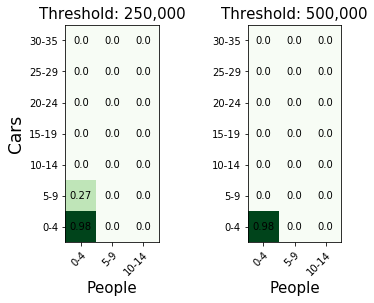

In [586]:
Cars = ["0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-35"]
Cars.reverse()
People = ["0-4", "5-9", "10-14"]

vlue = []
value2 = get_val(objects5)
for i in range(7):
    v=[]
    for j in range(3):
        v.append(round(value2[i*3+j],2))
    vlue.append(v)
vlue.reverse()
vlue = np.array(vlue,dtype=np.float)

fig, (ax1, ax2) = plt.subplots(1,2)
im = ax1.imshow(vlue,cmap="Greens")
# Show all ticks and label them with the respective list entries
ax1.set_xticks(np.arange(len(People)))
ax1.set_yticks(np.arange(len(Cars)))

ax1.set_xticklabels(People)
ax1.set_yticklabels(Cars)
ax1.set_xlabel("People", size=15)
ax1.set_ylabel("Cars", size=17)

# Rotate the tick labels and set their alignment.
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(Cars)):
    for j in range(len(People)):
        text = ax1.text(j, i, vlue[i, j],
                       ha="center", va="center", color="black")

ax1.set_title("Threshold: 250,000", size=15)

vlue = []
value = get_val(objects4)
for i in range(7):
    v=[]
    for j in range(3):
        v.append(round(value[i*3+j],2))
    vlue.append(v)
vlue.reverse()
vlue = np.array(vlue,dtype=np.float)

#fig, ax = plt.subplots()
im = ax2.imshow(vlue,cmap="Greens")

# Show all ticks and label them with the respective list entries
ax2.set_xticks(np.arange(len(People)))
ax2.set_yticks(np.arange(len(Cars)))

ax2.set_xticklabels(People)
ax2.set_yticklabels(Cars)
ax2.set_xlabel("People", size=15)

# Rotate the tick labels and set their alignment.
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(Cars)):
    for j in range(len(People)):
        text = ax2.text(j, i, vlue[i, j],
                       ha="center", va="center", color="black")

ax2.set_title("Threshold: 500,000", size=15)
plt.show()

# Ignore

In [82]:
aa=objects2[objects2["NumCars"]>8]
aa=aa[aa["NumPeople"]>2]
ab=objects2[objects2["NumCars"]>8]
ab=ab[ab["NumPeople"]<=2]
ba=objects2[objects2["NumCars"]<=8]
ba=ba[ba["NumPeople"]>2]
bb=objects2[objects2["NumCars"]<=8]
bb=bb[bb["NumPeople"]<=2]
print(len(aa[aa["Wealthy"]==1])/len(aa))
print(len(ab[ab["Wealthy"]==1])/len(ab))
print(len(ba[ba["Wealthy"]==1])/len(ba))
print(len(bb[bb["Wealthy"]==1])/len(bb))
print("")
print(len(aa))
print(len(ab))
print(len(ba))
print(len(bb))

0.1935483870967742
0.212253829321663
0.2261904761904762
0.3243445692883895

62
457
84
1335


In [83]:
objects3=pd.DataFrame(list(zip(objects["NumCars"],objects["NumPeople"],wealthy)))
objects3.columns =['NumCars', 'NumPeople', 'Wealthy']
aa=objects3[objects3["NumCars"]>2]
aa=aa[aa["NumPeople"]>0]
ab=objects3[objects3["NumCars"]>2]
ab=ab[ab["NumPeople"]<=0]
ba=objects3[objects3["NumCars"]<=2]
ba=ba[ba["NumPeople"]>0]
bb=objects3[objects3["NumCars"]<=2]
bb=bb[bb["NumPeople"]<=0]
print(len(aa[aa["Wealthy"]==1])/len(aa))
print(len(ab[ab["Wealthy"]==1])/len(ab))
print(len(ba[ba["Wealthy"]==1])/len(ba))
print(len(bb[bb["Wealthy"]==1])/len(bb))
print("")
print(len(aa))
print(len(ab))
print(len(ba))
print(len(bb))

0.2417910447761194
0.2782608695652174
0.3028571428571429
0.3467297084318361

335
920
175
1269
